## Librerias

In [46]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

Considere un péndulo forzado cuyo movimiento cumple la siguiente ecuación diferencial,

$$
\frac{d^2{\theta}}{d^2t}=-\frac{g}{l}\sin{\theta}+C\cos{\theta}\sin{\Omega t},
$$

donde $C$ y $\Omega$ son constantes.



a) Escriba la ecuación como un sistema dos ecuaciones diferenciales de primer orden.

Sus ecuaciones aqui

La dos ecuaciones diferenciales de primer orden serían:
$$
\frac{d{\theta}}{dt} = \omega,
$$
$$
\frac{d\omega}{dt} = \frac{g}{l}\sin{\theta}+C\cos{\theta}\sin{\Omega t},
$$

b) El metodo Runge-Kutta para ecuaciones diff de primer orden está dado por,

$$\frac{dy(t)}{dt} = f(t, y)$$

$$y_{n+1}=y_n+\frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$

\begin{align}
k_1 &= hf(t_n,y_n) \\
k_2 &= hf\left( t_n + \frac{h}{2},\, y_n + \frac{k_1}{2}\right)\\
k_3 &= hf\left( t_n + \frac{h}{2},\, y_n + \frac{k_2}{2}\right)\\
k_4 &= hf(t_n + h,y_n + k_3)
\end{align}

Mientras que el método Runge-Kutta para ecuaciones diff de segundo orden está dado por,


 ![](https://raw.githubusercontent.com/diegour1/Datafiles/main/Datafiles/runge%20kutta%202nd%20order.png)

 Explique en breves palabras las ecuaciones para el segundo orden de Runge Kutta.

Su texto aqui,

El método de Runge-Kutta de segundo orden, lo que hace es aplicar el método de Runge-Kutta para primer orden a cada una de las ecuaciones diferenciales de primer orden.

.

.

.

.

.

.

c) Usando la implementación de Runge Kutta en primer orden del siguiente [notebook](https://github.com/diegour1/MetodosComputacionales2/blob/main/Notebooks/06%20-%20First_order_differential_equations.ipynb), implemente el metodo de runge-kutta de 2do orden.

Pista: Existen dos formas de implementar runge kutta 2do orden, planteando las ecuaciones anteriores de forma completa, o planteando runge-kutta de una forma vectorial donde $[d\theta/dt, d\omega/dt] = [F(\theta, \omega, t), f(\theta, \omega, t)]$

In [47]:
### su codigo aqui
def runge_kutta_segundo_orden(f, theta0, t0, tf, h, w0):
  ws = [w0]
  thetas = [theta0]
  h_medios = h*0.5
  un_sexto = 1.0 / 6.0
  for t in np.arange(t0, tf, h):
    k1 = h*w0
    l1 = h * f(theta0, t)
    k2 = h*(w0+(1/2)*l1)
    l2 = h * f(theta0 + 0.5*k1, t + h_medios)
    k3 = h*(w0+(1/2)*l2)
    l3 = h * f(theta0 + 0.5*k2, t + h_medios)
    k4 = h*(w0+(1/2)*l3)
    l4 = h * f(theta0 + k3, t + h)
    
    theta1 = theta0 + un_sexto*(k1 + 2*k2 + 2*k3 + k4)
    thetas.append(theta1)
    theta0 = theta1
    
    w1 = w0 + un_sexto*(l1 + 2*l2 + 2*l3 + l4)
    ws.append(w1)
    w0 = w1

  return np.linspace(t0,tf,len(thetas)), np.array(thetas)


d) Resuelva la ecuación de $\theta$ en función de $t$ con $l = 10 \text{cm}$, $C = 2\text{s}^{-2}$, y $\Omega = 5 \text{s}^{-1}$. Genere un gráfico de $\theta$ en función del tiempo desde $t=0$ s hasta $t=10$ s. Las condiciones iniciales son $\theta = 0$ y $\text{d}\theta/\text{d}t = 0$.

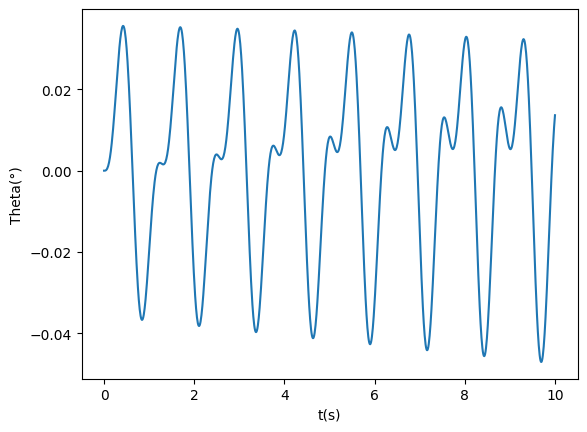

In [48]:
# su codigo aqui
l = 0.10
g = 9.8
C = 2
Omega = 5 
t0 = 0
tf = 10
theta0 = 0
w0 = 0
h = 0.01
def f1(theta,t):
  return (-g/l)*np.sin(theta) + C*np.cos(theta)*np.sin(Omega*t)



theta = runge_kutta_segundo_orden(f1, theta0, t0, tf, h, w0)
#print(theta[1])
plt.plot(theta[0],theta[1])
plt.xlabel("t(s)")
plt.ylabel("Theta(°)")
plt.show()